# First Step about tensorflow

## 1, fashion MNIST

In [2]:
# Import TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Import Helper library
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

##### label reference

1. T-shirt/top
1. Trouser
1. pullover
1. Dress
1. Coat
1. Sandal
1. Shirt
1. Sneaker
1. Bag
1. Ankle boot

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dfess', 'Coat', 
                'Sandal', 'Shirt', 'Snearker', 'Bag', 'Ankle boot' ]

In [5]:
# Observation the training data
print(train_imgs.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [6]:
#Observation the test data
print(test_imgs.shape)
print(len(test_imgs))
len(test_labels)

(10000, 28, 28)
10000


10000

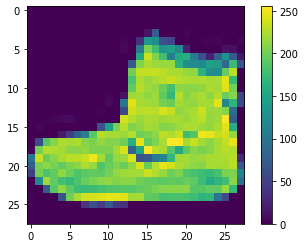

In [7]:
# PreProcessing of data
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

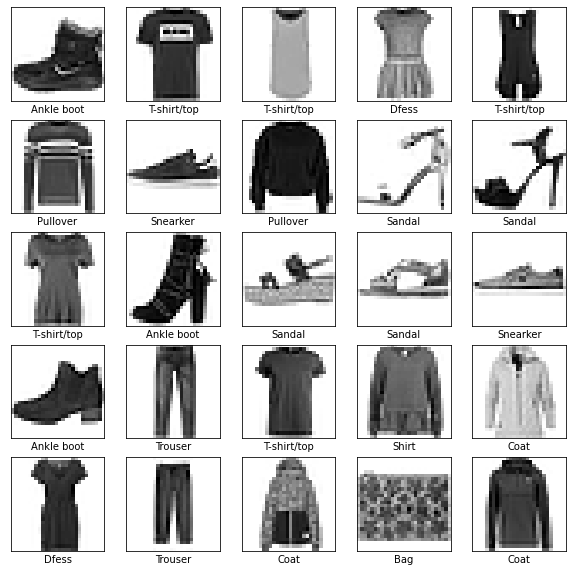

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# trian model
model.fit(train_imgs, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4992 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3373 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3133 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2936 - accuracy: 0.8921


In [13]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.3533 - accuracy: 0.8734

Test accuracy: 0.8733999729156494


In [14]:
# Prediction
predictions = model.predict(test_imgs)

In [15]:
predictions[0]

array([6.6882735e-06, 6.7046244e-09, 1.6747710e-05, 4.7494850e-06,
       3.8617459e-06, 8.2670953e-03, 1.9550361e-04, 3.0500825e-02,
       1.5497560e-04, 9.6084958e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img =predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show(close=None, block=None)>

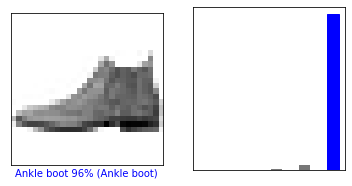

In [26]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_imgs)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show

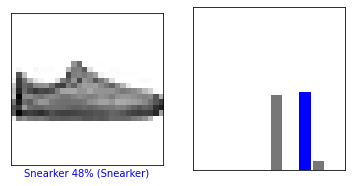

In [27]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_imgs)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

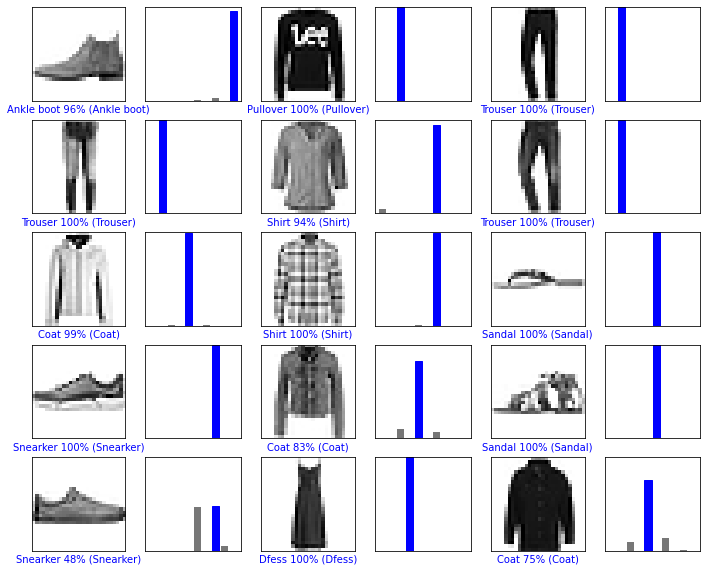

In [28]:
# show test image and predicted label, correct label
# correct predict: blue  incorrect predict: red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_imgs)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [29]:
# pull test image from testimage dataset
img = test_imgs[0]

print(img.shape)

(28, 28)


In [30]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)
print(predictions_single)

[[6.6882794e-06 6.7046244e-09 1.6747710e-05 4.7494850e-06 3.8617350e-06
  8.2670953e-03 1.9550361e-04 3.0500786e-02 1.5497529e-04 9.6084958e-01]]


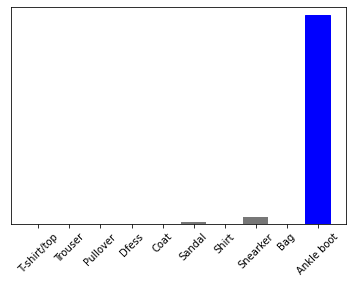

In [33]:
plot_value_array(0, predictions_single, test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

9